# Thera Bank has To Come Up with New Campaign Where they can issue Loans to existing Customers By approching them 

## Thera Bank Has Provided the Dataset which consists of 5000 Customer details 

### Problem Statement Tells us to find the personal loan buyers based on the given dataset where relationships 
### of other personal details are given which are corelateable to find the posibility of the customer to by a loan


### To Solve this Problem i am approching 3 algorithums Logistic Regression, k-Nearest Neighbors (K-NN) and Naive Bayes 
### By looking at thier Model Accurecy level and confussion matrics i will suggest the best model for implimentation 

In [90]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import seaborn as sns


# calculate accuracy measures and confusion matrix
from sklearn import metrics

### Note For discription of Thara bank reffering TheraBank_Column_Description file 

In [91]:
# Reading data from local disk ((for my refference)Please give Dataframe name as DF if Data set is taken from any file location)

DF = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
DF.head(30)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [92]:
DF.columns 

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [93]:
DF.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [94]:
DF.shape

(5000, 14)

### Lets print statistical data of each columns to decide the proper variable for the comparision to get the probability of customers who will take loans

In [95]:
DF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### From the Obesrvation the we can see variable contains numerical data as well as catagorical data 

### Here #Zip code and #ID are catagorical variables which is not having much effect on our models so we can drop this

### Here Personal Loan is target variable which is y this is to be pridicted baesd on information wheather person has taken loan or not here 0 reffercs to loan not taken by customers from same bank and 1 refferces to loan taken 

### So grouping the loan taken and not taken to see how many are not taken loan 

In [96]:
DF.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


### Here we can see 4520 customers are not taken loan and 480 customers taken Loan so larger number of customets in the given data set is not taken loan 

## Con.1 :- From this observation i can say that if i make a model which will help to campaign larger number of data in the given dataset which might give good results to Bank (Pre Pridiction based on this stats)

### Now we need to find the suitable variables of the customers which will make them to buy the loan 
### 1.CCavg which tell us the avg spending of the customers 
### 2.User Income which will give campaigner to reach out with proper offer and even CCavg vs income can be comparable which will give needness of the loan 
### 3.Proffesional experience which will give the trust of the customer based on his income and spending 
### 4.Experience of the customer which will give insight about his earnability 
### 5.Mortagage which will help to pridict his total asset values 
### 6.Family size which will give insight about his expendature and savings so that bank can offer loan based on his savings.
### 7.Age which will give insight about his ability to return loan for certain period of time.
### these are the dependent cariable so we can consider this as x 

### In experience variable some -Ve values are there so its preffered to replace with some absolute value since experence canot be -Ve it might be some missing informaton on dataset 

### -ve sign is ignored to make the operation 

In [97]:
DF['Experience'] = DF["Experience"].abs()### obsolute function to ignore the sign of the variables 
DF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Now from the personal loan data we need to visualize the person who atken loan and person who is not taken loan so we need to group our data by 0 or 1 from above observation we know personal loan taken ppl are 480 and not taken ppl are 4520

In [98]:
DF0 = DF.groupby('Personal Loan')
DF0 = DF0.get_group(0)
DF0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4520.0,2512.165487,1448.299331,1.0,1259.75,2518.5,3768.25,5000.0
Age,4520.0,45.367257,11.450427,23.0,35.00,45.0,55.00,67.0
Experience,4520.0,20.165487,11.398146,0.0,10.00,20.0,30.00,43.0
Income,4520.0,66.237389,40.578534,8.0,35.00,59.0,84.00,224.0
ZIP Code,4520.0,93152.428761,2156.949654,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4520.0,2.373451,1.148771,1.0,1.00,2.0,3.00,4.0
CCAvg,4520.0,1.729009,1.567647,0.0,0.60,1.4,2.30,8.8
Education,4520.0,1.843584,0.839975,1.0,1.00,2.0,3.00,3.0
Mortgage,4520.0,51.789381,92.038931,0.0,0.00,0.0,98.00,635.0
Personal Loan,4520.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [99]:
DF1 = DF.groupby('Personal Loan')
DF1 = DF1.get_group(1)
DF1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,480.0,2390.650000,1394.393674,10.0,1166.50,2342.0,3566.0000,4981.0
Age,480.0,45.066667,11.590964,26.0,35.00,45.0,55.0000,65.0
Experience,480.0,19.843750,11.582443,0.0,9.00,20.0,30.0000,41.0
Income,480.0,144.745833,31.584429,60.0,122.00,142.5,172.0000,203.0
ZIP Code,480.0,93153.202083,1759.223753,90016.0,91908.75,93407.0,94705.5000,96008.0
Family,480.0,2.612500,1.115393,1.0,2.00,3.0,4.0000,4.0
CCAvg,480.0,3.905354,2.097681,0.0,2.60,3.8,5.3475,10.0
Education,480.0,2.233333,0.753373,1.0,2.00,2.0,3.0000,3.0
Mortgage,480.0,100.845833,160.847862,0.0,0.00,0.0,192.5000,617.0
Personal Loan,480.0,1.000000,0.000000,1.0,1.00,1.0,1.0000,1.0


### now we will plot the pair plot 
### droping catagorical variable ID

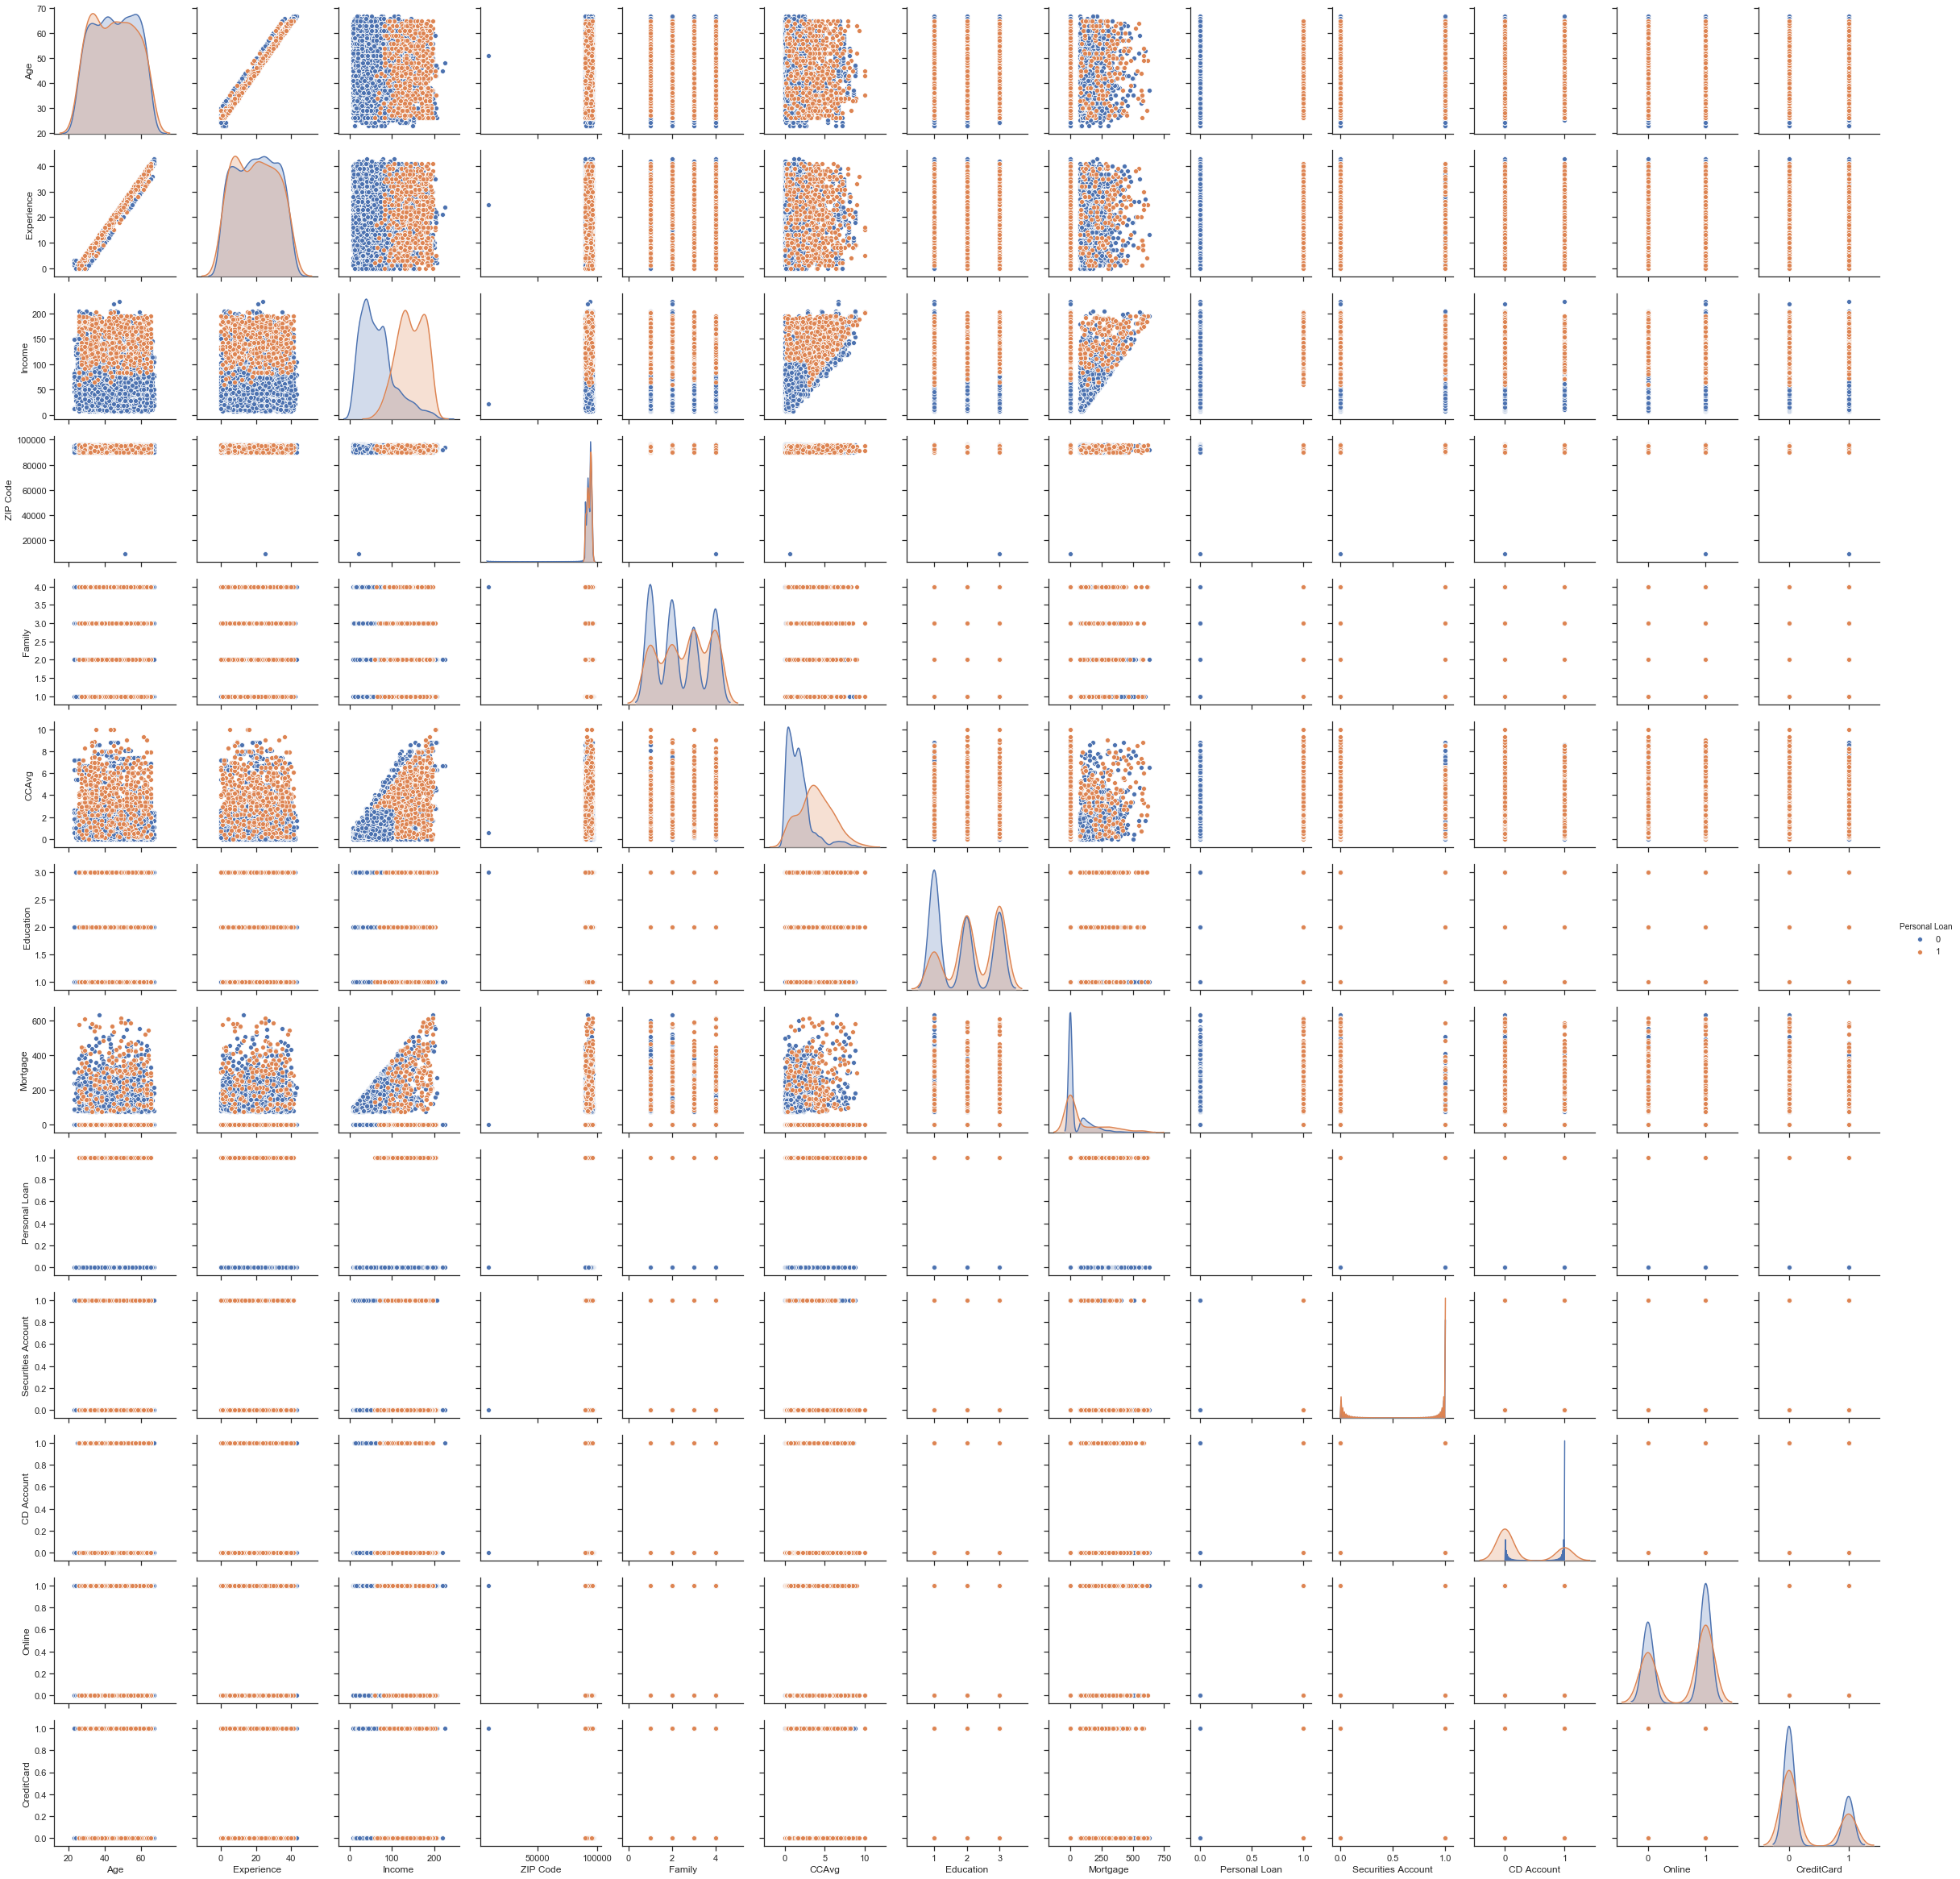

In [100]:
sns.pairplot(DF.iloc[:,1:], hue='Personal Loan')

### Data Visuvalization for better underatnding of corelations of the variable 

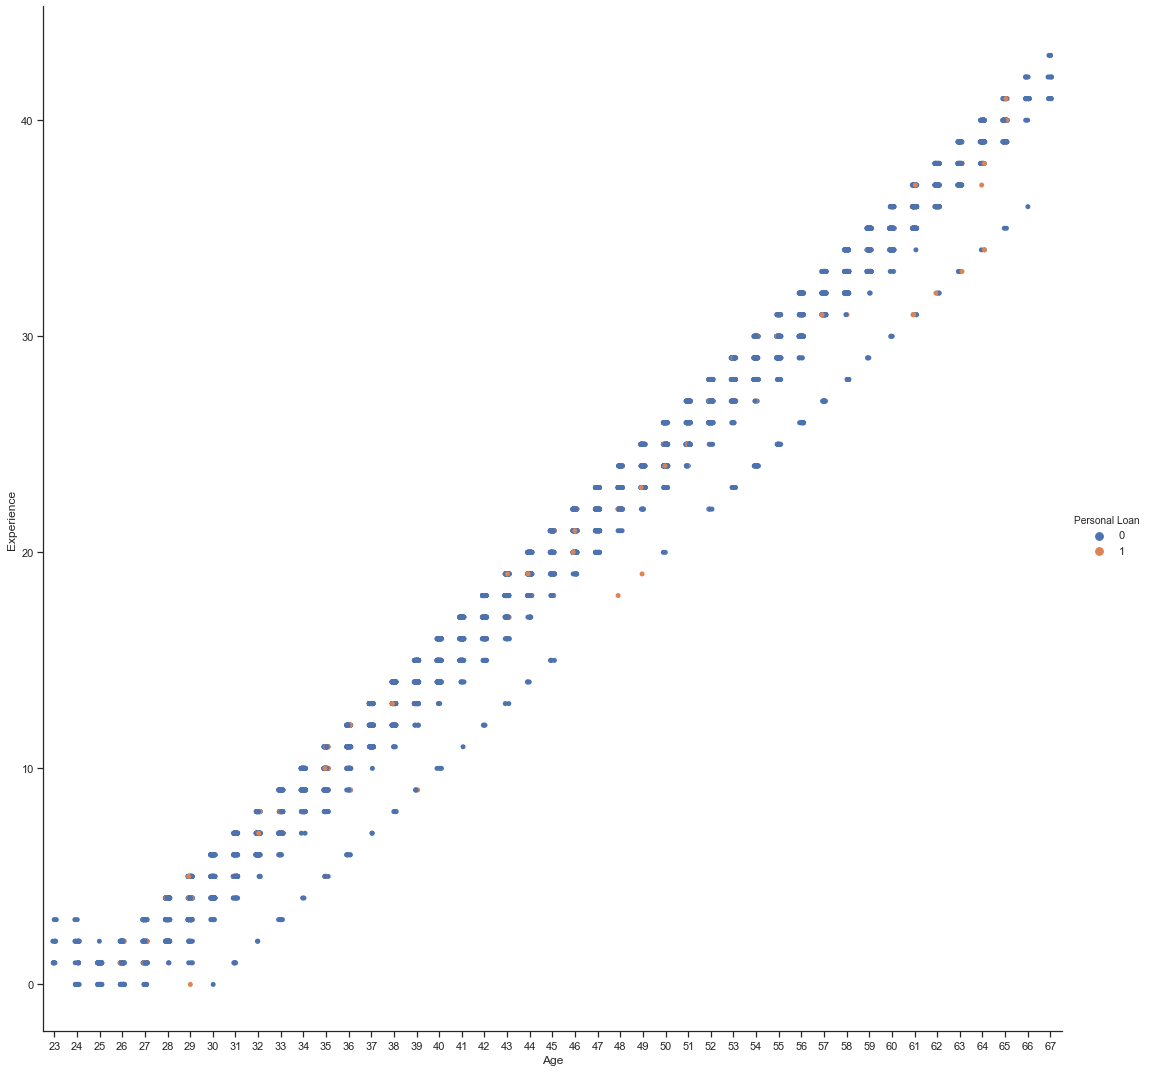

In [101]:
sns.catplot(x='Age', y='Experience', hue ='Personal Loan', data = DF,height =15,aspect=1)

## 1. here we can see age between 40 to 65 ppl are taken more number of loans so there is a posiblility of less age ppl to involve in the loan for more number of years by offering long term and bulk amount

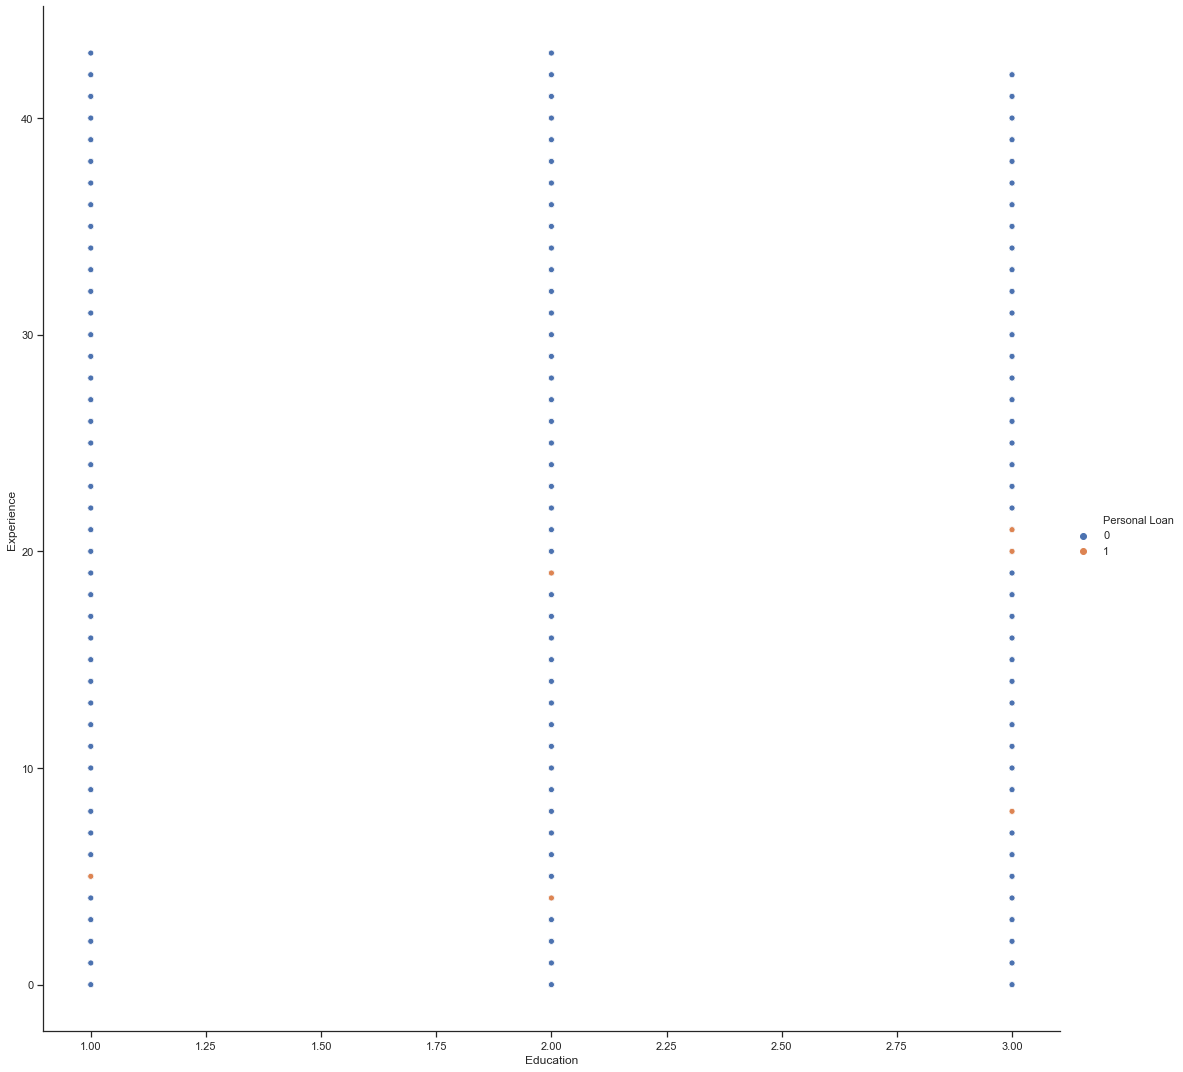

In [102]:
sns.relplot(x='Education', y='Experience', hue ='Personal Loan',height =15, data = DF)

In [103]:
##sns.set(style="ticks")
##DF = sns.load_dataset("DF")
##g = sns.relplot(X="Education", Y="Experience", hue="Personal loan", data=DF)

### for above code environment not supporting need to check in conda installer 

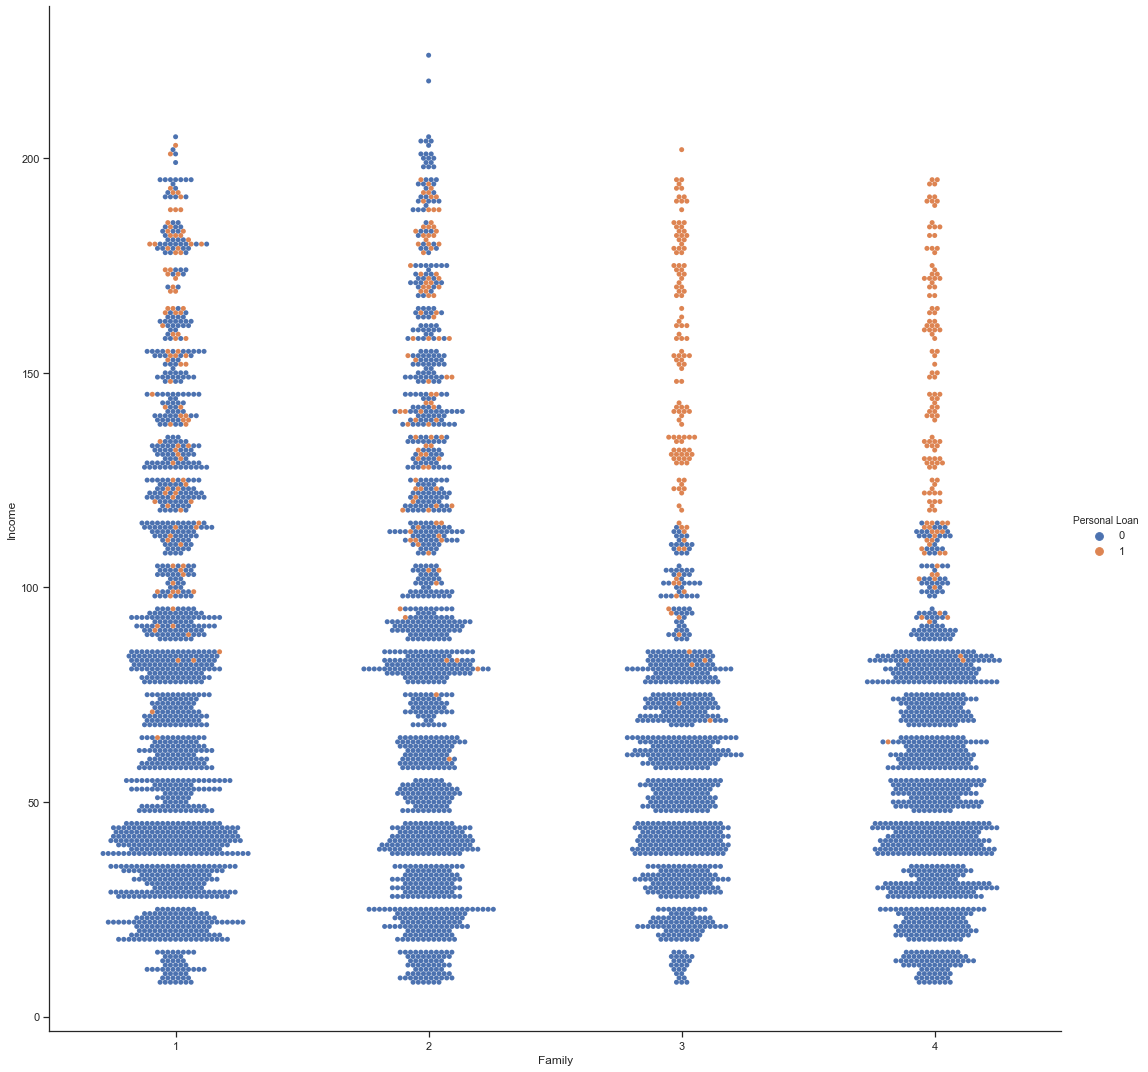

In [104]:
sns.catplot(x='Family', y='Income', hue ='Personal Loan', data = DF, kind='swarm', height=15, aspect=1)

### 2.Here we cam observe that family with more than 4 having income more than 85 have taken more loans so its substancially shows lower salary with lower member in family are less likely to go for loan, so campain must be designed to attract less membered family with less income too 

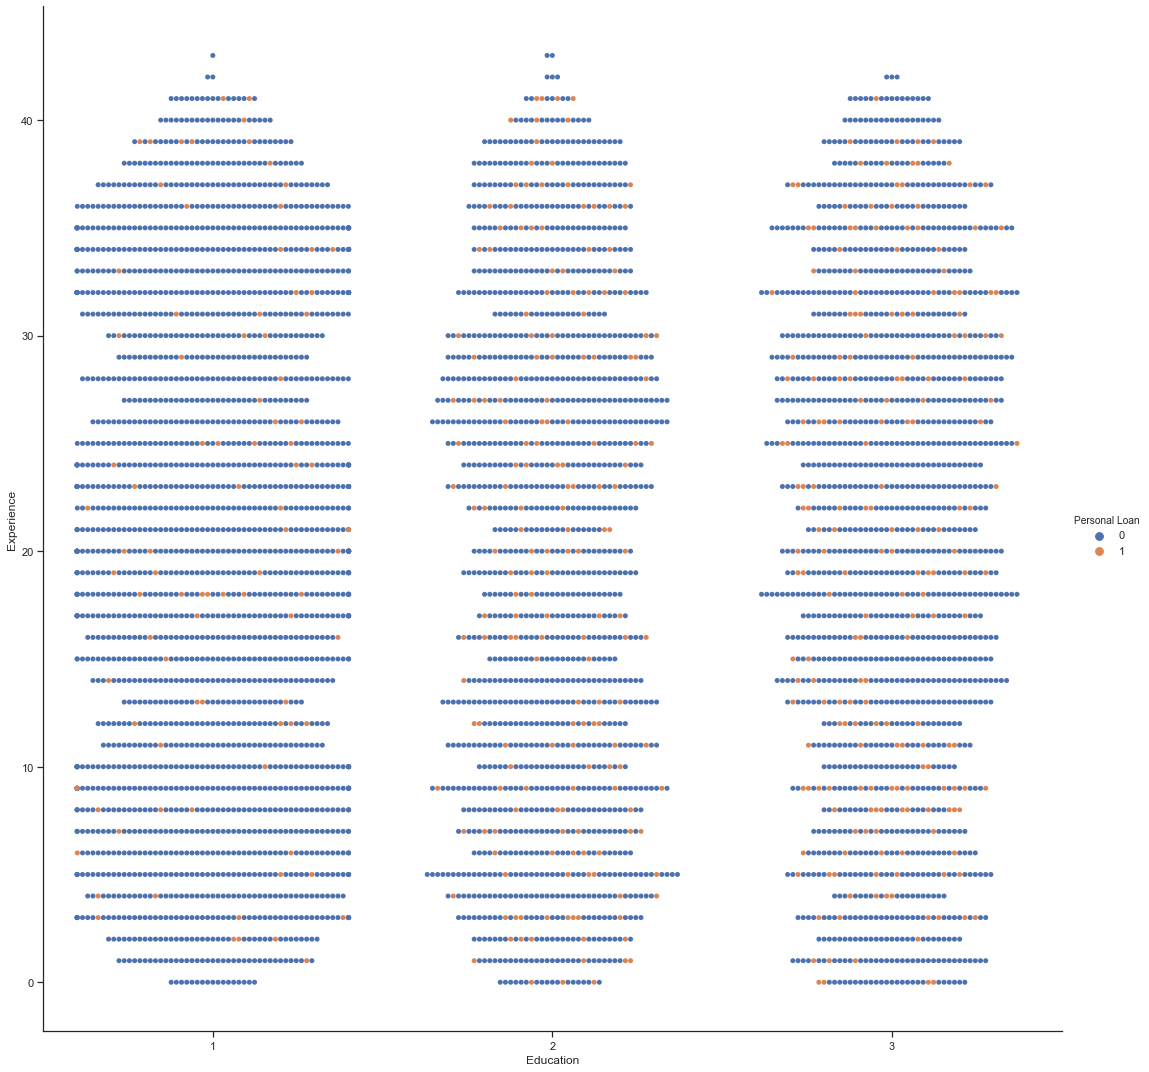

In [105]:
sns.catplot(x='Education', y='Experience', hue ='Personal Loan', data = DF, kind='swarm',height = 15, aspect=1)

### 3.Education and experience are not the good criteria for getting the corelation and posibility checking for buying of loan since all the education and experience ppl are taken loan in first campaign 

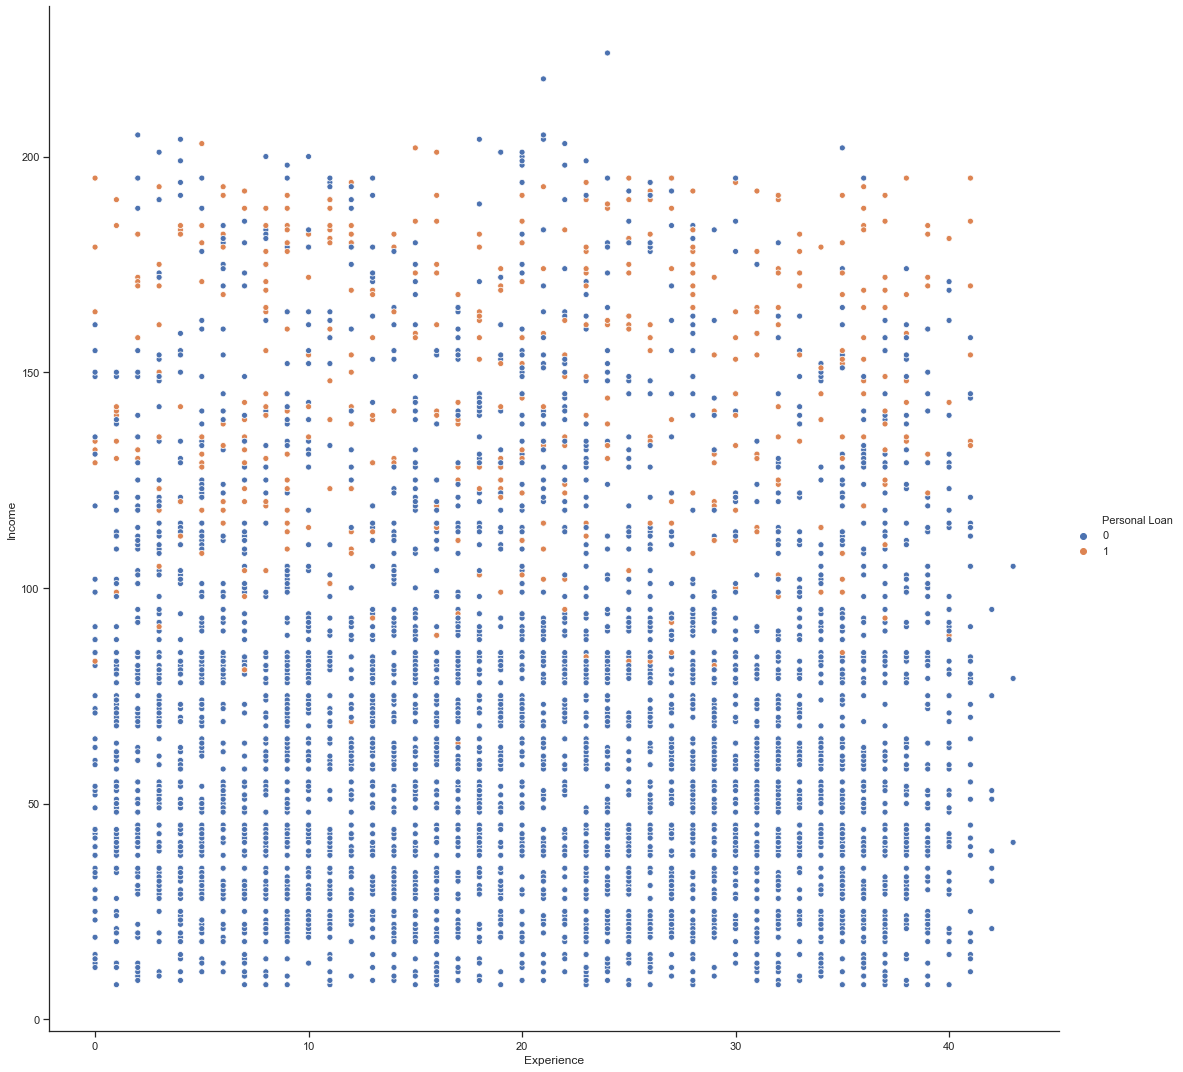

In [106]:
sns.relplot(x='Experience', y='Income', hue ='Personal Loan', data = DF,height = 15, aspect=1)

### 4.from this we can see that more income ppl are intrested to buy more loan from 1 st campaign so we can concentrate on them in similer way with better campaign plan similerly need to concentrate on less income and less experience ppl to get more loan 

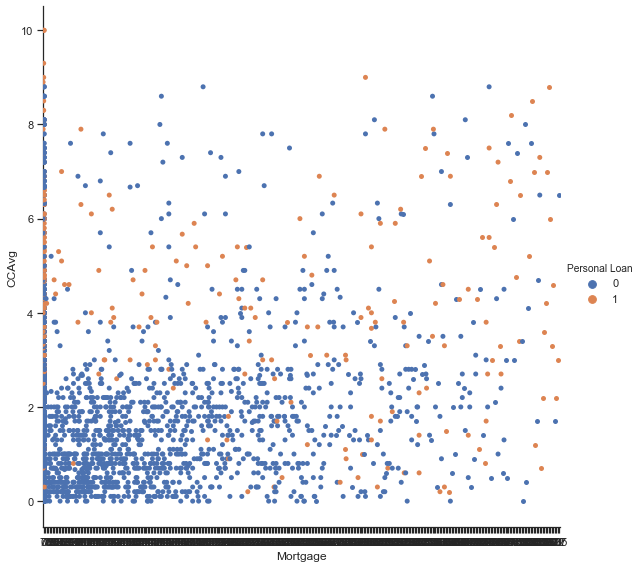

In [110]:
sns.catplot(x='Mortgage', y='CCAvg', hue ='Personal Loan', data = DF, kind='swarm', height=8, aspect=1)

## 5.Here Corelation is less b/w Mortgage to expendeature of each person here all catagory ppl taken loan in last campaign so its dificult to judge in this co relation 

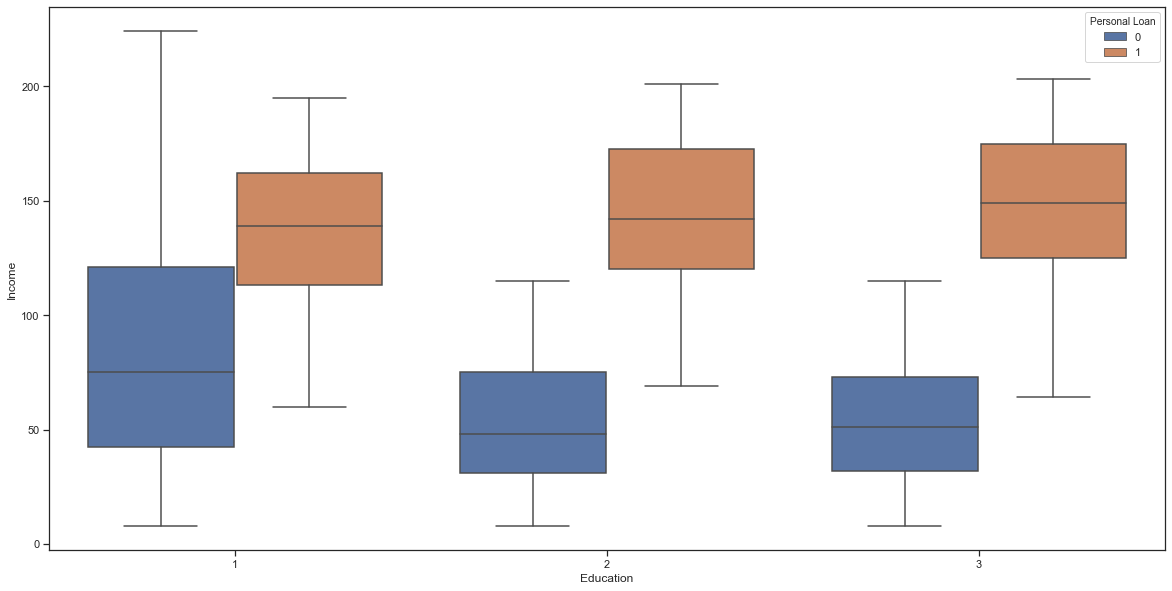

In [111]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=DF)

### 6. here we can see clearly say irrespective of education larger income ppl are likely to get loan so next campaign must concentrate these category

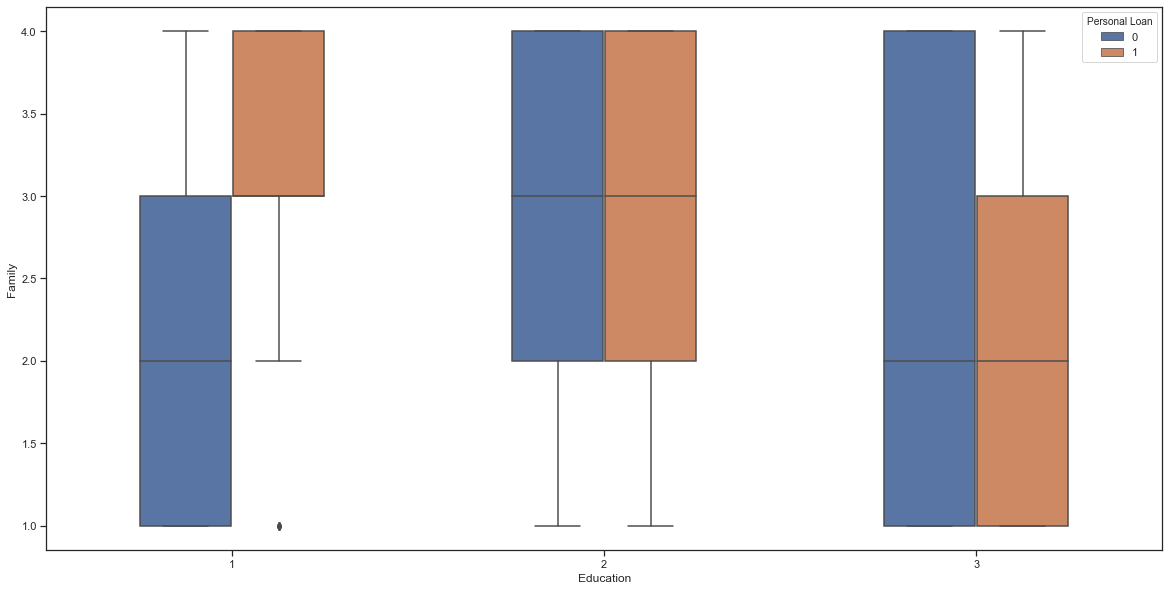

In [112]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Education',y='Family',hue='Personal Loan',data=DF, width=0.5)

## 7.here in these 2 variable comparission we can say more education with less number of ppl in family are likely to get more loan and more members with less educations are also intrested in loans so we need to prepare campaign accordingly 

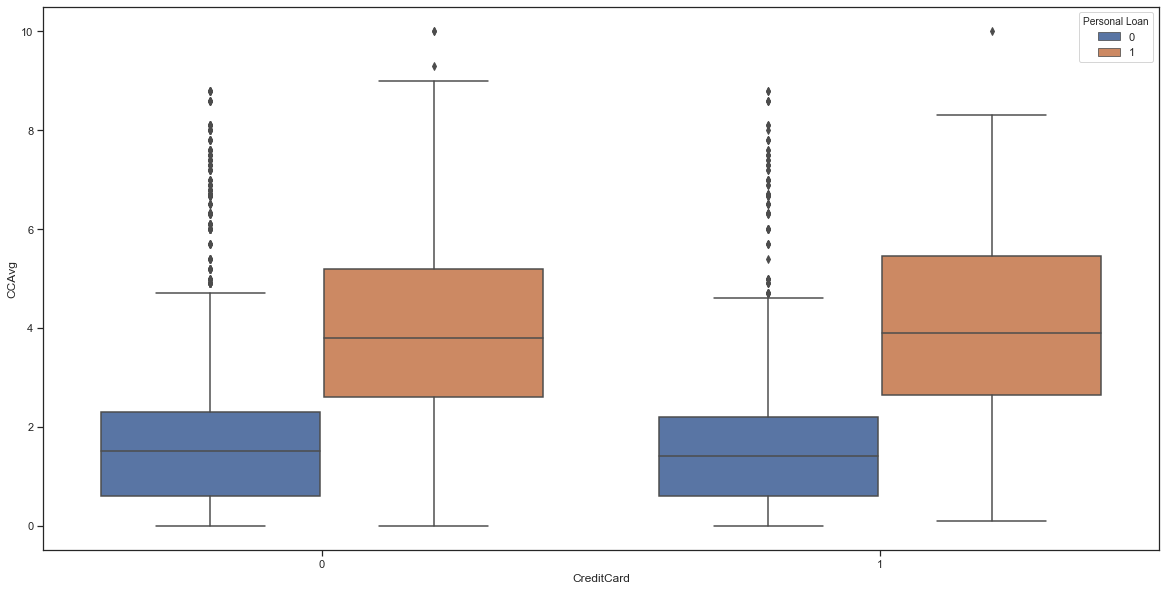

In [114]:
plt.figure(figsize=(20,10))
sns.boxplot('CreditCard','CCAvg',hue='Personal Loan',data=DF)

## 8. from this plot its clear that wheather ppl have credit card or not they will choose the loan option so probability and posibility of pridicting ppl getting loans on this criteria is less

## Ploting Heat map to see the corelation 

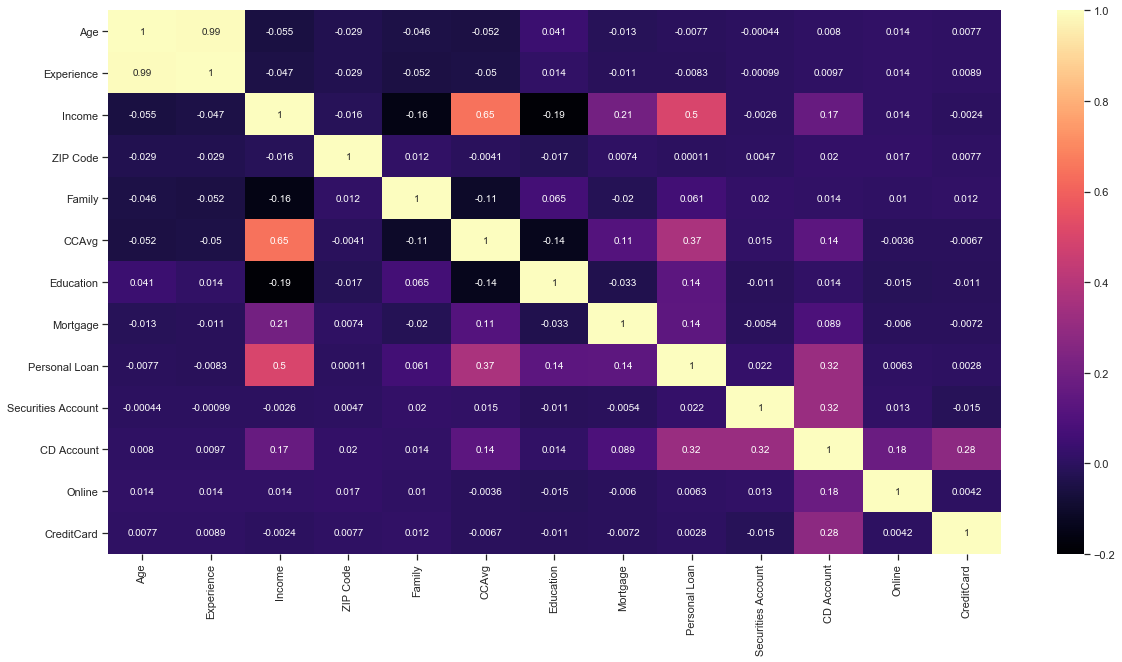

In [124]:
DF_nid= DF.drop('ID', axis=1)
H_P = DF_nid.corr()
plt.figure(figsize=(20,10))
sns.heatmap(H_P,annot=True,cmap='magma',vmin=-0.2,vmax=1)

### 1.from heat map we can see personal loan having good corelation with income,Spending(CCAVG),CD (Certificate of deposite),education and mortgage
### 2.More Income will tempt ppl to make more CCAvg and will make ppl to buy personal loan  and even these ppl will be following rules like mortgage keeping while getting loans and certificate of deposite of money . 
### 3.More corelation can be seen in age and experience 

## Now Modelling Different Algorithums to Check the Accurecy so that we can apply those modelling to our campaign 

#### Splitting data with for train and test
#### keeping appropriate variables 
#### ID is not applicabe and experience is highly corelatable so we can drope both from dataframe 
#### Personal Loan is Y its a intended target variable 
#### rest of the variables are X which are functional variables 

In [131]:
X = DF.drop(['ID','Experience','Personal Loan'], axis=1)
y = DF['Personal Loan']
print(X.columns)

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')


### Split data for train and test 

In [135]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Scaling is done for future use 

In [136]:
from sklearn import preprocessing

ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=10)

# 1.Logistic Regression 

In [139]:

from sklearn.linear_model import LogisticRegression
model1a = LogisticRegression()

# Apply training data to the logistic regression model
model1a.fit(X_train, y_train)

#Predict the test results
y_predict = model1a.predict(X_test)

#Calculate the coefficients of logistic regression model
t = list(X_train.columns)
df = pd.DataFrame(model1a.coef_, columns= t)
df['intercept'] = model1a.intercept_
df

D:\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,intercept
0,0.007155,0.037557,-0.000071,0.015505,0.005647,0.018257,0.000537,0.001144,0.004903,-0.000517,-0.000134,-0.000084


## model score and  confusion matrix

In [140]:
model1a_score = model1a.score(X_test, y_test)
print(model1a_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8993333333333333
[[1302   58]
 [  93   47]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1360
           1       0.45      0.34      0.38       140

    accuracy                           0.90      1500
   macro avg       0.69      0.65      0.66      1500
weighted avg       0.89      0.90      0.89      1500



### Model accuracy is 0.8993 ~ 0.90
True Positives = 47
,True Negatives = 1302
,False Positives= 58
,False Negatives= 93

In [142]:
# Apply Scaled training data to the logistic regression model
model1b = LogisticRegression()
model1b.fit(ZX_train, y_train)

#Predict the test results
y_predict = model1b.predict(ZX_test)

#Calculate the coefficients of logistic regression model

coef_df = pd.DataFrame(model1b.coef_, columns= t)
coef_df['intercept'] = model1b.intercept_
coef_df

D:\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,intercept
0,0.091097,2.43813,-0.02636,0.758031,0.181394,1.338921,0.001545,-0.209886,0.843772,-0.355392,-0.471615,-4.467691


In [143]:
model1b_score = model1b.score(ZX_test, y_test)
print(model1b_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.9526666666666667
[[1339   21]
 [  50   90]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1360
           1       0.81      0.64      0.72       140

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



## Model accuracy is improved to 0.95
,True Positives = 90
,True Negatives = 1339
,False Positives= 21
,False Negatives= 50

# NAIVE BAYES Algorithum

In [144]:
from sklearn.naive_bayes import GaussianNB
model2a = GaussianNB()
model2a.fit(X_train,y_train)
y_predict = model2a.predict(X_test)
model2a_score = model2a.score(X_test, y_test)
print(model2a_score)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

0.886
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1360
           1       0.42      0.61      0.50       140

    accuracy                           0.89      1500
   macro avg       0.69      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500

[[1243  117]
 [  54   86]]


### Model accuracy is 0.886
,True Positives = 86
,True Negatives = 1243
,False Positives= 117
,False Negatives= 54

In [145]:
model2b = GaussianNB()
model2b.fit(ZX_train,y_train)
y_predict = model2b.predict(ZX_test)
model2b_score = model2b.score(ZX_test, y_test)
print(model2b_score)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

0.8786666666666667
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1360
           1       0.40      0.60      0.48       140

    accuracy                           0.88      1500
   macro avg       0.68      0.75      0.71      1500
weighted avg       0.90      0.88      0.89      1500

[[1234  126]
 [  56   84]]


### Model accuracy decreases to 0.878
,True Positives = 84
,True Negatives = 1234
,False Positives= 126
,False Negatives= 56

# k-Nearest Neighbors (KNN) Algorithum

In [149]:
from sklearn.neighbors import KNeighborsClassifier
KNN_a= KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
KNN_a.fit(X_train, y_train)
y_predict = KNN_a.predict(X_test)
KNN_a_score = KNN_a.score(X_test, y_test)
print(KNN_a_score)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

0.8813333333333333
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1360
           1       0.34      0.30      0.32       140

    accuracy                           0.88      1500
   macro avg       0.64      0.62      0.63      1500
weighted avg       0.87      0.88      0.88      1500

[[1280   80]
 [  98   42]]


### Model accuracy is 0.881
True Positives = 42
True Negatives = 1280
False Positives= 80
False Negatives= 98

In [152]:
KNN_b = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
KNN_b.fit(ZX_train, y_train)
y_predict = KNN_b.predict(ZX_test)
KNN_b_score = KNN_b.score(ZX_test, y_test)
print(KNN_b_score)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

0.964
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1360
           1       0.92      0.67      0.78       140

    accuracy                           0.96      1500
   macro avg       0.94      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500

[[1352    8]
 [  46   94]]


###Model accuracy increases to 0.964
True Positives = 94
True Negatives = 1351
False Positives= 8
False Negatives= 46

In [151]:
Accuracy_Before_Scaling = {'Logistic Regression': model1a_score, 'Naive Bayes': model2a_score, 'K-Nearest Neighbors': NNH_a_score}
Accuracy_After_Scaling = {'Logistic Regression': model1b_score, 'Naive Bayes': model2b_score, 'K-Nearest Neighbors': NNH_b_score}

print('Overall Model Accuracy before scaling:')
print (Accuracy_Before_Scaling)
print('\n')
print('Overall Model Accuracy After scaling:')
print (Accuracy_After_Scaling)

Overall Model Accuracy before scaling:
{'Logistic Regression': 0.8993333333333333, 'Naive Bayes': 0.886, 'K-Nearest Neighbors': 0.8813333333333333}


Overall Model Accuracy After scaling:
{'Logistic Regression': 0.9526666666666667, 'Naive Bayes': 0.8786666666666667, 'K-Nearest Neighbors': 0.964}


### Here from above observations from logistic regression there is huge change in Accurecy befor changing and after changing scaling from 89 to 95 percentage.

### Here in NAIVE BAYES there is reduction in accurecy so this model is not good for the given dataset here accurecy reduced from 88 to 87 percentage after scaling. 

### Here in KNN there is a grastic improvement of the model from original to after scaling this showes the algorithum is having better performence so this algorithum can be used in pridicting the Personal Loan buyers from given dataset here accurecy raised from 88 to 96 percentage .

### From The confusion Matrix we can see least False Positive and least false negetive errors so which tells the probability of making erros with the KNN is less compare to logistic regression So we can impliment the Model for Thera Bank with the KNN model hence the conclusion 

### Thnaks and Regards
### Kiran Mogeraya